In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')#ignore warnings in program

#import datasets

customer = pd.read_csv('olist_customers_dataset.csv')
location =  pd.read_csv('olist_geolocation_dataset.csv')
order_item = pd.read_csv('olist_order_items_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
seller = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#shows the number of columns, number of non-null values, datatyp of each column
#how many columns of each datatypes, and memory usage
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [3]:
#shows the first 5 rows in the dataset
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#shows the last 5 rows in the dataset
customer.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [5]:
#shows how many data has null value for each column
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
#shows how many rows are duplicated in the dataset
customer.duplicated().sum()

0

In [7]:
#shows how many unique data there is in each column
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [8]:
#change the zip code to object so that it wont be treated as a number
customer['customer_zip_code_prefix'] = customer['customer_zip_code_prefix'].astype(object)

In [9]:
customer.describe(include = 'all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [10]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
location.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [13]:
location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
# Use the .duplicated() method to find duplicated rows based on all columns
duplicates = location[location.duplicated(keep='last')]

# Display the duplicated rows
print(duplicates)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
6                               1047       -23.546273       -46.641225   
7                               1013       -23.546923       -46.634264   
...                              ...              ...              ...   
1000031                        99950       -28.066645       -52.010510   
1000064                        99950       -28.070800       -52.013832   
1000076                        99950       -28.071572       -52.014364   
1000112                        99970       -28.343273       -51.873734   
1000115                        99950       -28.073596       -52.015197   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao pa

In [15]:
location.duplicated().sum()

261831

In [16]:
#remove duplicated rows
location_no_dup = location.drop_duplicates()

In [17]:
print(location_no_dup)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000155                        99965       -28.180655       -52.034367   
1000156                        99950       -28.072188       -52.011272   
1000157                        99950       -28.068864       -52.012964   
1000158                        99950       -28.068639       -52.010705   
1000161                        99980       -28.388932       -51.846871   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao pa

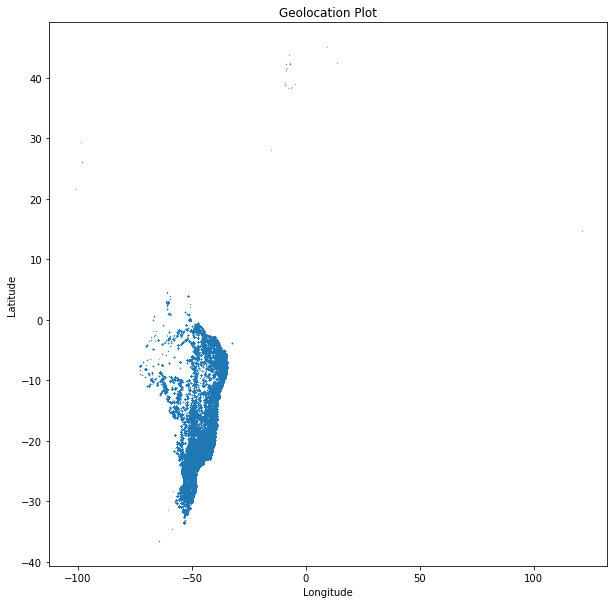

In [18]:
plt.figure(figsize=(10, 10))  # Set the figure size
scatter_loc = plt.scatter(location['geolocation_lng'], location['geolocation_lat'], s=0.05)
plt.title('Geolocation Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
#limit the range locations to remove noise and increase accuracy of the locations
new_location = location[(location['geolocation_lat'] >-50) &
                        (location['geolocation_lat']<10)&
                        (location['geolocation_lng']>-80)&
                        (location['geolocation_lng']<-35)]

In [20]:
num_removed_loc = len(location) - len(new_location)
print('Number of location points removed are ', num_removed_loc)

Number of location points removed are  11682


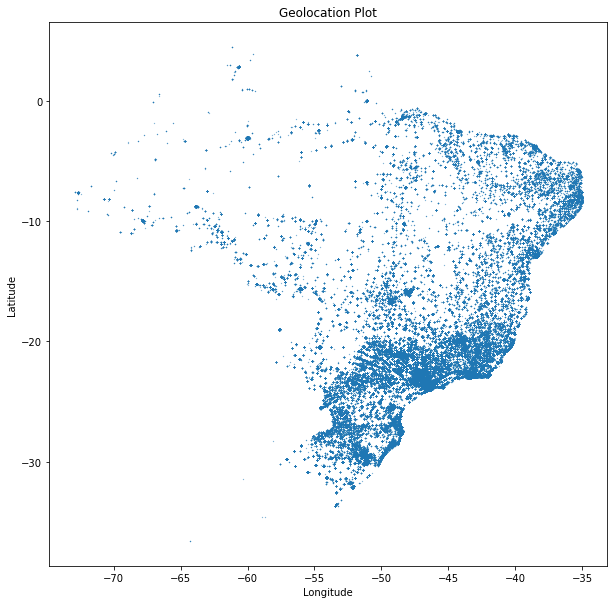

In [21]:
plt.figure(figsize=(10, 10))  # Set the figure size
scatter_loc = plt.scatter(new_location['geolocation_lng'], new_location['geolocation_lat'], s=0.05)
plt.title('Geolocation Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [22]:
!pip install mplcursors

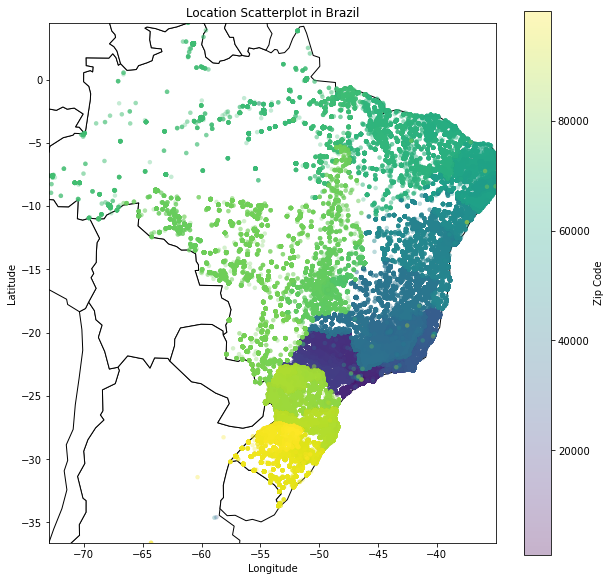

In [23]:
import geopandas as gpd

# Read the shapefile into a GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming new_location is your GeoDataFrame with latitude and longitude columns
min_lat, max_lat = new_location['geolocation_lat'].min(), new_location['geolocation_lat'].max()
min_lon, max_lon = new_location['geolocation_lng'].min(), new_location['geolocation_lng'].max()

world = world.cx[min_lon:max_lon, min_lat:max_lat]

ax = world[world.continent == "South America"].plot(color ="white", edgecolor = "black", figsize=(10,10))

scatter = plt.scatter(
    new_location['geolocation_lng'],
    new_location['geolocation_lat'],
    s=20,  # Adjust the marker size as needed
    c=new_location['geolocation_zip_code_prefix'],  # Use zip codes for color
    cmap='viridis',  # Choose a colormap (you can use any Matplotlib colormap)
    edgecolor='none',  # Add edge color for better visibility
    alpha=0.3
)

# Set the plot limits based on the bounding box of your points
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

# Add a colorbar for the zip codes
cbar = plt.colorbar(scatter, label='Zip Code')

# Add a title and axis labels
plt.title('Location Scatterplot in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [24]:
new_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988481 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  988481 non-null  int64  
 1   geolocation_lat              988481 non-null  float64
 2   geolocation_lng              988481 non-null  float64
 3   geolocation_city             988481 non-null  object 
 4   geolocation_state            988481 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.2+ MB


In [25]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
order_item.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [28]:
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
order_item.duplicated().sum()

0

In [30]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [32]:
payment.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [33]:
payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [34]:
payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [35]:
payment.duplicated().sum()

0

In [36]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [37]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [38]:
review.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [39]:
review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [40]:
review.duplicated().sum()


0

In [41]:
review.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [42]:
payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [43]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [44]:
payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [45]:
payment = payment[payment['payment_type'] != 5]

In [46]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [47]:
payment.describe(include = 'all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [48]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [50]:
order.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [51]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
order.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [53]:
from datetime import datetime

#get the mean timestamp for order approved at timestamp

order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])

mean_date = order['order_approved_at'].mean()

mean_timestamp = mean_date.strftime("%Y/%M/%D %H:%M")

print("Mean Timestamp:", mean_timestamp)

Mean Timestamp: 2017/35/12/31/17 18:35


In [54]:
#fill in the empty values in order_approved_at column with the mean timestamp
order['order_approved_at'].fillna(mean_timestamp, inplace = True)

In [55]:
# Convert the datetime strings to datetime objects
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])

#get mean timestamp
mean_date1 = order['order_delivered_carrier_date'].mean()

mean_timestamp1 = mean_date1.strftime("%Y/%M/%D %H:%M")

print("Mean delivered carrier date:", mean_timestamp1)



Mean delivered carrier date: 2018/49/01/04/18 21:49


In [56]:
# Convert the datetime strings to datetime objects
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])

#get mean date
mean_date2 = order['order_delivered_customer_date'].mean()

mean_timestamp2 = mean_date2.strftime("%Y/%M/%D %H:%M")

print("Mean delivered customer date:", mean_timestamp2)


# Convert the datetime strings to datetime objects
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

mean_date3 = order['order_delivered_customer_date'].mean()

mean_timestamp3 = mean_date3.strftime("%Y/%M/%D %H:%M")
print("Mean estimated delivary date:", mean_date3)



Mean delivered customer date: 2018/09/01/14/18 12:09
Mean estimated delivary date: 2018-01-14 12:09:19.035542272


In [57]:
#fill in the empty values with the mean timestamp
order['order_delivered_carrier_date'].fillna(mean_timestamp1, inplace = True)

order['order_delivered_customer_date'].fillna(mean_timestamp2, inplace = True)


order['order_estimated_delivery_date'].fillna(mean_timestamp3, inplace = True)

In [58]:
order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [59]:
order.duplicated().sum()

0

In [60]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [61]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [62]:
product.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [63]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [64]:
product.dropna(subset=['product_category_name'], inplace=True)


In [65]:
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [66]:
product=product.dropna()

In [67]:
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [68]:
product.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [69]:
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [70]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [71]:
translation.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [72]:
translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [73]:
translation.duplicated().sum()

0

In [74]:
seller.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [75]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [76]:
seller.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [77]:
seller.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [78]:
seller.duplicated().sum()

0

In [79]:
seller.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [80]:
# Merge the two dataframes on the common columns 'product_category name' 
merged_df = product.merge(translation, left_on='product_category_name', right_on='product_category_name', how='left')

# Drop the redundant 'Zip_Prefix' column
merged_df.drop(columns=['product_category_name'], inplace=True)

In [81]:
merged_df

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [82]:
# Merge the two dataframes on the common columns 'product_id' 
merged_product_name = merged_df.merge(order_item, left_on='product_id', right_on='product_id', how='left')

# Drop the redundant column
merged_product_name.drop(columns=['product_id'], inplace=True)

In [83]:
merged_product_name

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111042,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111043,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111044,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [84]:
merged_product_name.drop(columns=['product_name_lenght', 'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], inplace=True)

In [85]:
merged_product_name

,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...
111041,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111042,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111043,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111044,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


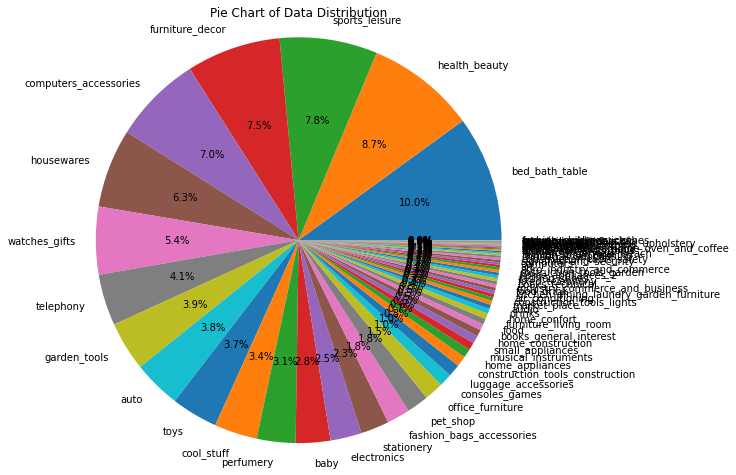

In [86]:
data_column=merged_product_name['product_category_name_english']

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(data_column.value_counts(), labels=data_column.value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Data Distribution')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

plt.show()  # Display the pie chart

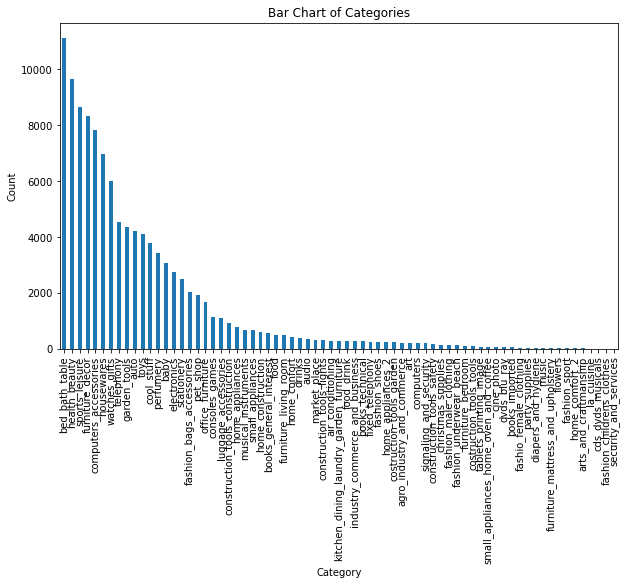

In [87]:
category_counts = data_column.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart of Categories')

plt.show()

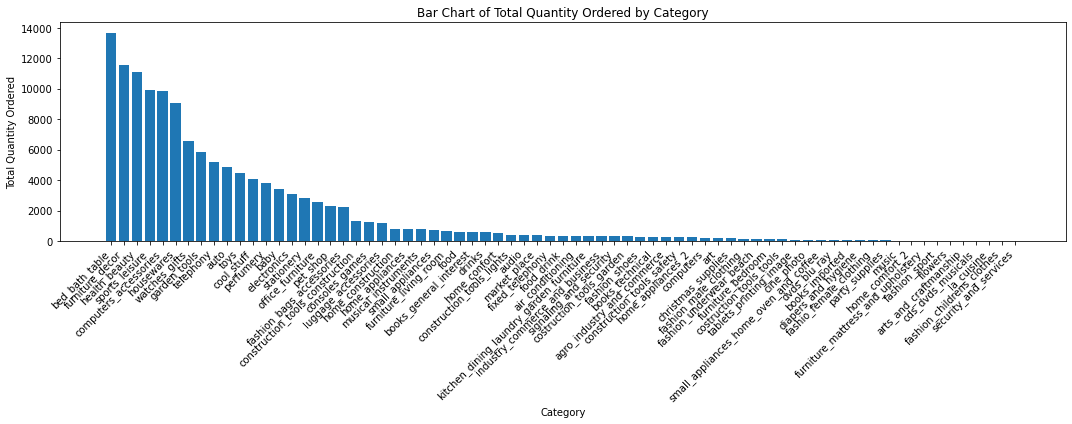

In [88]:
# Group the data by 'Category_Name' and sum the 'Quantity' for each category
category_quantities = merged_product_name.groupby('product_category_name_english')['order_item_id'].sum().reset_index()
# Sort the categories by quantity in descending order
category_quantities = category_quantities.sort_values(by='order_item_id', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 6))  # Set the figure size

# Plot the bars for each category and its corresponding quantity
plt.bar(category_quantities['product_category_name_english'], category_quantities['order_item_id'])

plt.xlabel('Category')
plt.ylabel('Total Quantity Ordered')
plt.title('Bar Chart of Total Quantity Ordered by Category')

# Rotate the category labels for better readability
plt.xticks(rotation=45, ha='right')
bar_width= 8
spacing = 8
plt.tight_layout()  # Adjust layout for better label display

plt.show()

In [89]:
# Merge the two dataframes on the common columns 'product_category name' 
merged_product = product.merge(order_item, left_on='product_id', right_on='product_id', how='left')

# Drop the redundant 'Zip_Prefix' column
merged_product.drop(columns=['product_id'], inplace=True)




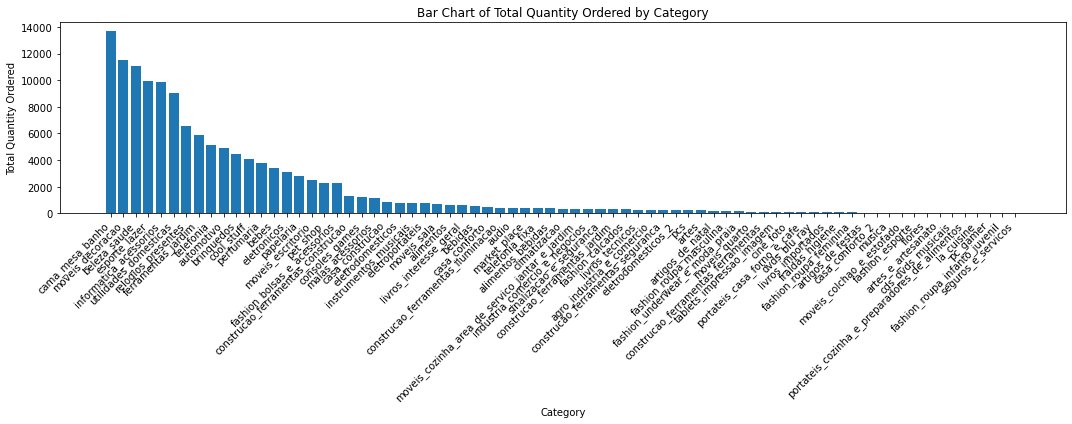

In [90]:



# Group the data by 'Category_Name' and sum the 'Quantity' for each category
category_quantities1 = merged_product.groupby('product_category_name')['order_item_id'].sum().reset_index()
# Sort the categories by quantity in descending order
category_quantities1 = category_quantities1.sort_values(by='order_item_id', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 6))  # Set the figure size

# Plot the bars for each category and its corresponding quantity
plt.bar(category_quantities1['product_category_name'], category_quantities1['order_item_id'])

plt.xlabel('Category')
plt.ylabel('Total Quantity Ordered')
plt.title('Bar Chart of Total Quantity Ordered by Category')

# Rotate the category labels for better readability
plt.xticks(rotation=45, ha='right')
bar_width= 8
spacing = 8
plt.tight_layout()  # Adjust layout for better label display

plt.show()

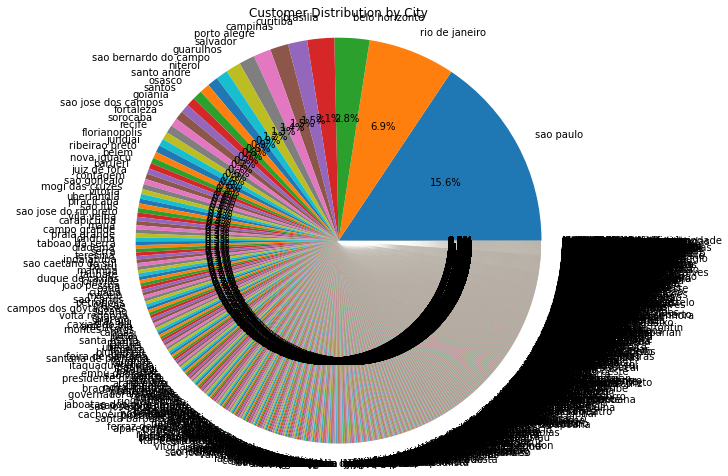

In [91]:
city_counts = customer['customer_city'].value_counts()

treshold=0.01
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Customer Distribution by City')
plt.show()

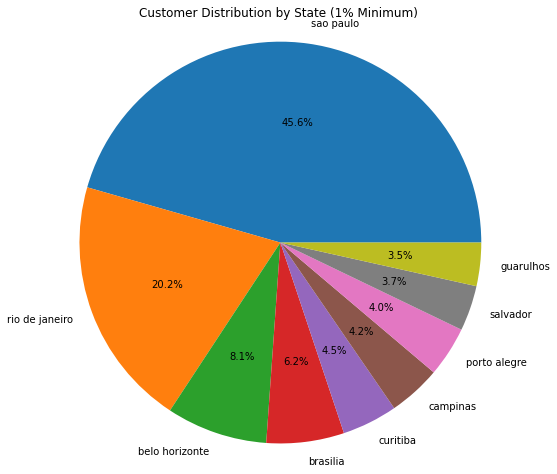

In [92]:

# Count customers in each city
city_counts = customer['customer_city'].value_counts()

#set treshold to 1%
threshold = 0.01 

# cities with customer population less than 1%
small_cities = city_counts[city_counts / city_counts.sum() < treshold]

# cities with customer population greater than 1%
big_city = city_counts[city_counts /city_counts.sum() >= treshold]


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(big_city, labels=big_city.index, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Customer Distribution by State (1% Minimum)')
plt.show()

Pearson Correlation Coefficient: 0.023268253706815265
P-value: 0.1354130335268582


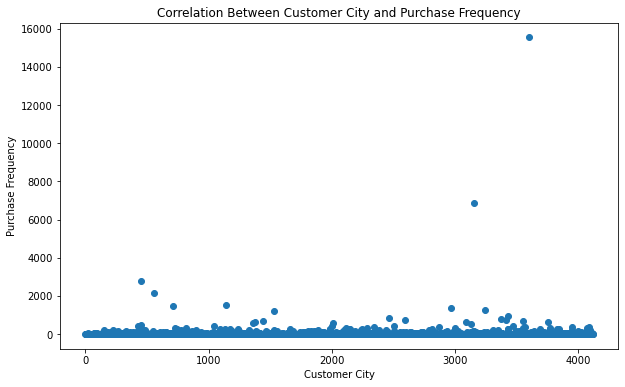

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your data and transform the 'Category' column
customer['customer_city'] = label_encoder.fit_transform(customer['customer_city'])


# Calculate the number of purchases for each city (frequency)
city_purchase_frequency = customer['customer_city'].value_counts()

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(city_purchase_frequency.index, city_purchase_frequency.values)

# Display the correlation coefficient and p-value
print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_purchase_frequency.index, city_purchase_frequency.values)
plt.xlabel('Customer City')
plt.ylabel('Purchase Frequency')
plt.title('Correlation Between Customer City and Purchase Frequency')
plt.show()


In [94]:
#merge payment and order_item datasframe to make get the payment value for each order
sales = pd.merge(payment, order_item, on='order_id', how='inner')
# Merge the result with the 'order' DataFrame to get the date of purchase of each order
sales = pd.merge(sales, order, on='order_id', how='inner')
sales = pd.merge(sales, product, on= 'product_id', how = 'inner')

# Merge the two dataframes on the common columns 'product_category name' 
sales = pd.merge(sales, translation, on='product_category_name', how= 'inner')

# # Drop the redundant 'Zip_Prefix' column
sales.drop(columns=['product_category_name'], inplace=True)
sales

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_delivered_customer_date,order_estimated_delivery_date,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,2018-05-09 17:36:51,2018-05-22,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,2018-04-20 00:07:39,2018-05-09,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,1,2233b59e8cf2817f9659e52cce3093de,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,...,2018-06-18 16:41:04,2018-07-04,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,home_construction
3,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,...,2018-03-02 22:29:04,2018-03-08,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
4,1d84d00f6d2334d63f35ba528cd0d99d,1,boleto,1,63.74,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2018-02-22 06:56:27,54.40,...,2018-02-21 01:26:56,2018-02-26,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115872,cb53f0b6e8f9082a9f5a113765dd1236,1,credit_card,6,97.48,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,...,2018-06-05 21:52:02,2018-06-28,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes
115873,cab08f0417a702d0f4782ec02356a4ac,1,boleto,1,107.06,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,...,2017-10-30 12:37:42,2017-11-01,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes
115874,3da4b0f0c89bb8fee8a810459e641414,1,credit_card,1,118.96,1,28ac6af4008a402e5039f3e042a36e13,28ea411b354f14b1a494be4e79f0ce02,2017-06-15 18:20:19,110.00,...,2017-06-13 13:23:01,2017-06-23,48.0,488.0,5.0,500.0,36.0,10.0,26.0,fashion_childrens_clothes
115875,3be3bae6f665380f803dc59c9053cf26,1,boleto,1,66.69,1,2b18330ce86ae5c606250b75b499f370,7fe21dd00d2f4943ae09525efa2fd674,2017-08-14 04:10:13,49.90,...,2018/09/01/14/18 12:09,2017-08-31,42.0,277.0,3.0,120.0,19.0,11.0,15.0,fashion_childrens_clothes


In [95]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115877 entries, 0 to 115876
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115877 non-null  object        
 1   payment_sequential             115877 non-null  int64         
 2   payment_type                   115877 non-null  object        
 3   payment_installments           115877 non-null  int64         
 4   payment_value                  115877 non-null  float64       
 5   order_item_id                  115877 non-null  int64         
 6   product_id                     115877 non-null  object        
 7   seller_id                      115877 non-null  object        
 8   shipping_limit_date            115877 non-null  object        
 9   price                          115877 non-null  float64       
 10  freight_value                  115877 non-null  float64       
 11  

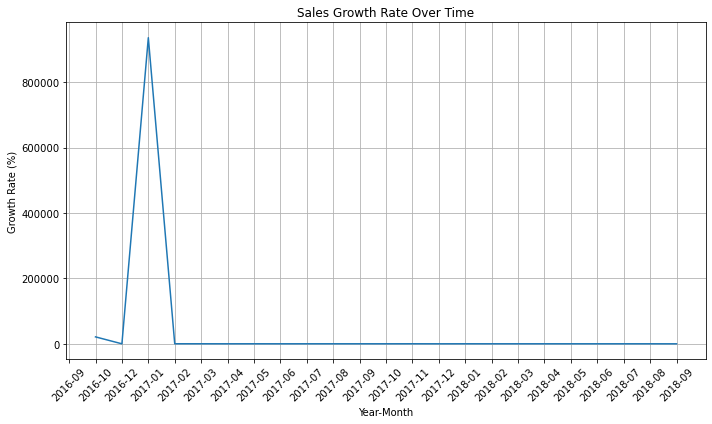

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'timestamp' is the timestamp column and 'payment_value' is the sales column
# Convert 'timestamp' to a datetime object
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')

# Extract month and year from the timestamp
sales['year_month'] = sales['order_purchase_timestamp'].dt.to_period('M')

# Group by month and calculate the total sales for each month
monthly_sales = sales.groupby('year_month')['payment_value'].sum().reset_index()

# Calculate the growth rate
monthly_sales['growth_rate'] = monthly_sales['payment_value'].pct_change() * 100

# Convert 'year_month' to string
monthly_sales['year_month'] = monthly_sales['year_month'].dt.strftime('%Y-%m')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(monthly_sales['year_month'].values, monthly_sales['growth_rate'].values)
plt.title('Sales Growth Rate Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

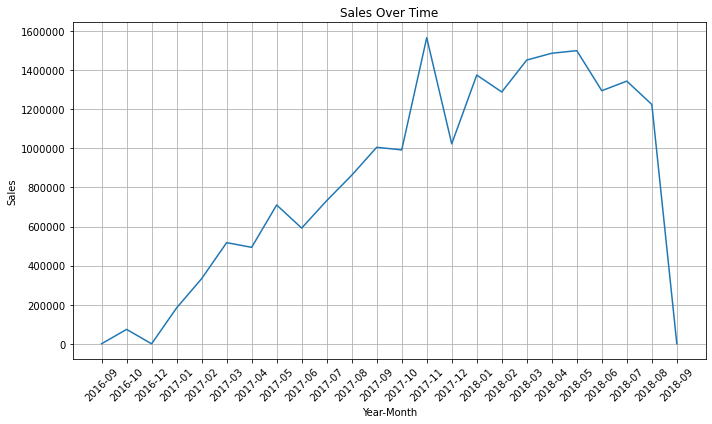

In [97]:
# Assuming 'timestamp' is the timestamp column and 'payment_value' is the sales column
# Convert 'timestamp' to a datetime object
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'])

# Extract month and year from the timestamp
sales['year_month'] = sales['order_purchase_timestamp'].dt.to_period('M')

# Group by month and calculate the total sales for each month
monthly_sales = sales.groupby('year_month')['payment_value'].sum().reset_index()

# Convert 'year_month' to string
monthly_sales['year_month'] = monthly_sales['year_month'].dt.strftime('%Y-%m')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(monthly_sales['year_month'].values, monthly_sales['payment_value'].values, linestyle = '-')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

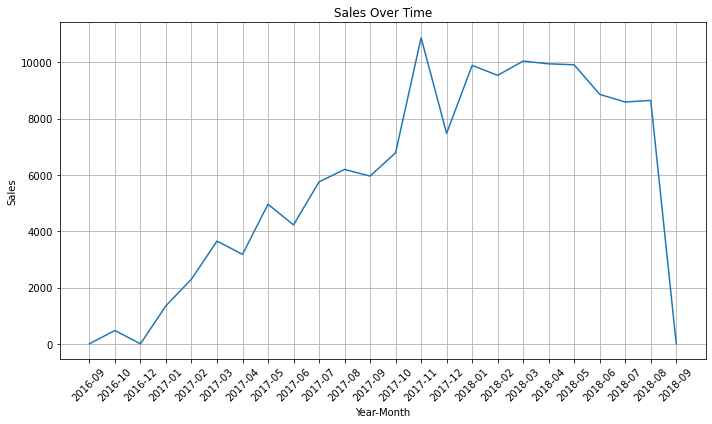

In [98]:
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'])

# Extract month and year from the timestamp
sales['year_month'] = sales['order_purchase_timestamp'].dt.to_period('M')

# Group by month and calculate the total sales for each month
monthly_sales = sales.groupby('year_month')['order_item_id'].sum().reset_index()

# Convert 'year_month' to string
monthly_sales['year_month'] = monthly_sales['year_month'].dt.strftime('%Y-%m')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(monthly_sales['year_month'].values, monthly_sales['order_item_id'].values)
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
!pip install apyori

In [100]:
!pip install mlxtend --user

In [101]:
from mlxtend.frequent_patterns import association_rules, apriori


# Convert product_category_name to a list of lists (transactions)
transactions = sales.pivot_table(index='order_id',columns ='product_category_name_english',values = 'order_item_id',aggfunc='sum').fillna(0)

def encode(x):
    if x <=0:
        return 0
    else:
        return 1
df_pivot = transactions.applymap(encode)

support = 0.00001
frequent_items = apriori(df_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False)


metric = 'lift'
min_treshold = 0.00001

rules = association_rules(frequent_items, metric=metric, min_threshold=min_treshold)[['antecedents','consequents','support','confidence','lift']]
rules.reset_index(drop=True).sort_values('confidence',ascending=False, inplace = True)
rules

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(computers_accessories),(air_conditioning),0.000010,0.000149,0.057468
1,(air_conditioning),(computers_accessories),0.000010,0.003953,0.057468
2,(air_conditioning),(sports_leisure),0.000010,0.003953,0.049793
3,(sports_leisure),(air_conditioning),0.000010,0.000130,0.049793
4,(furniture_decor),(art),0.000051,0.000775,0.373279
...,...,...,...,...,...
569,"(furniture_decor, sports_leisure)",(pet_shop),0.000010,0.333333,18.957895
570,"(pet_shop, sports_leisure)",(furniture_decor),0.000010,1.000000,15.080478
571,(furniture_decor),"(pet_shop, sports_leisure)",0.000010,0.000155,15.080478
572,(pet_shop),"(furniture_decor, sports_leisure)",0.000010,0.000585,18.957895


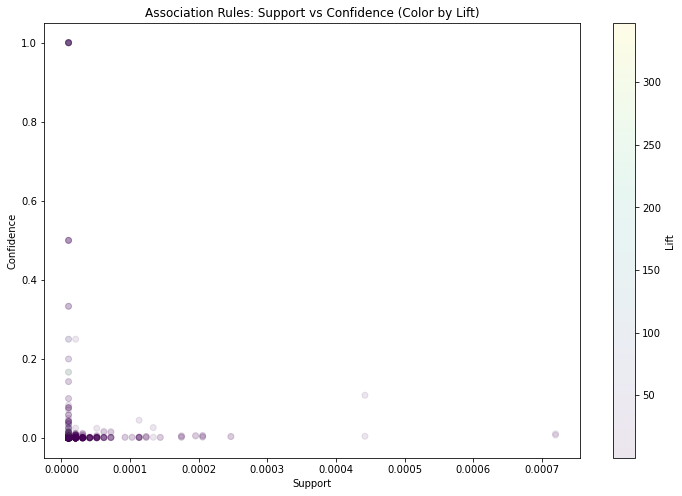

In [102]:
# Scatter plot rules by support, confidence, and color by lift
plt.figure(figsize=(12, 8))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.1)

# Add colorbar
plt.colorbar(scatter, label='Lift')

# Set labels and title
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Color by Lift)')

plt.show()

In [103]:
customer_sales = pd.merge(payment, order, on='order_id')
columns_to_drop = ['order_id','payment_sequential','payment_installments','payment_type','order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
customer_sales.drop(columns= columns_to_drop , inplace=True)

# Group by 'customer_id' and sum the prices
customer_sales = customer_sales.groupby('customer_id')['payment_value'].sum().reset_index()


# # Keep only 'customer_id' and 'total_price' columns
# result = result[['customer_id', 'total_price']]

customer_sales

,customer_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,81.36
99436,fffeda5b6d849fbd39689bb92087f431,63.13
99437,ffff42319e9b2d713724ae527742af25,214.13
99438,ffffa3172527f765de70084a7e53aae8,45.50


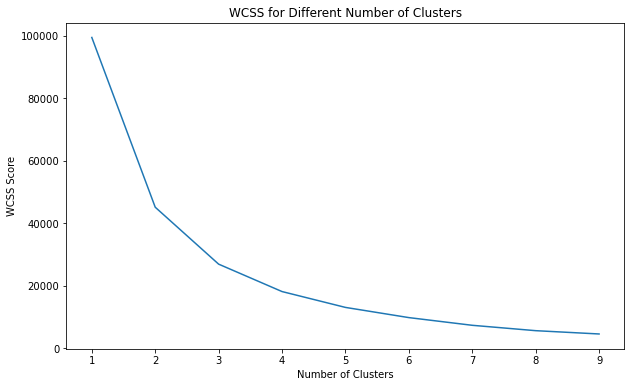

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

wcss = []
score =[]

sample = ['payment_value']

# Extracting features for clustering
X = customer_sales[sample]

scaler = StandardScaler(with_mean = False)

#standardize the data
X_scaled = scaler.fit_transform(X)


# Determine the optimal number of clusters using wcss
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    pred_kmean = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
#     score.append(score(X_scaled, pred_kmean))


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10),wcss)
plt.title('WCSS for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()

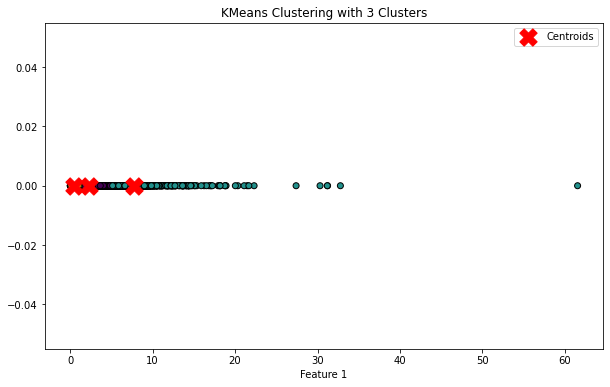

In [105]:
# Apply KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=3)
pred_kmean_optimal = kmeans_optimal.fit_predict(X_scaled)


# Plotting the KMeans clusters with the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], [0] * len(X_scaled), c=pred_kmean_optimal, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], [0] * 3, s=300, c='red', marker='X', label='Centroids')
plt.title(f'KMeans Clustering with 3 Clusters')
plt.xlabel('Feature 1')
plt.legend()
plt.show()

In [106]:
value_counts = sales['product_category_name_english'].unique()

# Print or use the value counts
print(value_counts)

['home_construction' 'auto' 'perfumery' 'bed_bath_table' 'housewares'
 'art' 'sports_leisure' 'furniture_living_room' 'garden_tools'
 'electronics' 'signaling_and_security' 'cool_stuff' 'watches_gifts'
 'baby' 'furniture_decor' 'construction_tools_lights' 'pet_shop'
 'health_beauty' 'office_furniture' 'consoles_games' 'home_appliances'
 'telephony' 'toys' 'stationery' 'books_general_interest'
 'computers_accessories' 'small_appliances' 'fashion_bags_accessories'
 'costruction_tools_garden' 'musical_instruments' 'christmas_supplies'
 'luggage_accessories' 'construction_tools_construction'
 'costruction_tools_tools' 'market_place' 'food_drink' 'home_confort'
 'fixed_telephony' 'audio' 'air_conditioning' 'home_appliances_2'
 'fashion_sport' 'kitchen_dining_laundry_garden_furniture'
 'construction_tools_safety' 'food' 'industry_commerce_and_business'
 'computers' 'drinks' 'fashion_shoes' 'books_imported'
 'agro_industry_and_commerce' 'books_technical' 'music'
 'fashion_male_clothing' 'diap

In [107]:
def classify_cat(x):
    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'
  


sales['product_category_name_english'] = sales.product_category_name_english.apply(classify_cat)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115877 entries, 0 to 115876
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115877 non-null  object        
 1   payment_sequential             115877 non-null  int64         
 2   payment_type                   115877 non-null  object        
 3   payment_installments           115877 non-null  int64         
 4   payment_value                  115877 non-null  float64       
 5   order_item_id                  115877 non-null  int64         
 6   product_id                     115877 non-null  object        
 7   seller_id                      115877 non-null  object        
 8   shipping_limit_date            115877 non-null  object        
 9   price                          115877 non-null  float64       
 10  freight_value                  115877 non-null  float64       
 11  

In [108]:
sales

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_estimated_delivery_date,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,year_month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,2018-05-22,57.0,921.0,8.0,800.0,17.0,27.0,17.0,Furniture,2018-04
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,2018-05-09,57.0,921.0,8.0,800.0,17.0,27.0,17.0,Furniture,2018-04
2,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,1,2233b59e8cf2817f9659e52cce3093de,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,...,2018-07-04,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,Furniture,2018-06
3,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,...,2018-03-08,57.0,565.0,4.0,800.0,38.0,38.0,22.0,Furniture,2018-02
4,1d84d00f6d2334d63f35ba528cd0d99d,1,boleto,1,63.74,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2018-02-22 06:56:27,54.40,...,2018-02-26,57.0,565.0,4.0,800.0,38.0,38.0,22.0,Furniture,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115872,cb53f0b6e8f9082a9f5a113765dd1236,1,credit_card,6,97.48,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,...,2018-06-28,47.0,327.0,3.0,300.0,30.0,20.0,20.0,Fashion,2018-06
115873,cab08f0417a702d0f4782ec02356a4ac,1,boleto,1,107.06,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,...,2017-11-01,47.0,327.0,3.0,300.0,30.0,20.0,20.0,Fashion,2017-09
115874,3da4b0f0c89bb8fee8a810459e641414,1,credit_card,1,118.96,1,28ac6af4008a402e5039f3e042a36e13,28ea411b354f14b1a494be4e79f0ce02,2017-06-15 18:20:19,110.00,...,2017-06-23,48.0,488.0,5.0,500.0,36.0,10.0,26.0,Fashion,2017-06
115875,3be3bae6f665380f803dc59c9053cf26,1,boleto,1,66.69,1,2b18330ce86ae5c606250b75b499f370,7fe21dd00d2f4943ae09525efa2fd674,2017-08-14 04:10:13,49.90,...,2017-08-31,42.0,277.0,3.0,120.0,19.0,11.0,15.0,Fashion,2017-08


In [132]:

concat_sales = pd.merge(sales,customer, on = 'customer_id', how='inner')

concat_sales = concat_sales.drop(columns=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','product_name_lenght','product_description_lenght','product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm'])
concat_sales = pd.merge(concat_sales, new_location, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')


# concat_sales
# concat_sales.info()
print(concat_sales[['product_category_name_english']])


         product_category_name_english
0                            Furniture
1                            Furniture
2                            Furniture
3                            Furniture
4                            Furniture
...                                ...
17576326                 Entertainment
17576327                 Entertainment
17576328                 Entertainment
17576329                 Entertainment
17576330                 Entertainment

[17576331 rows x 1 columns]


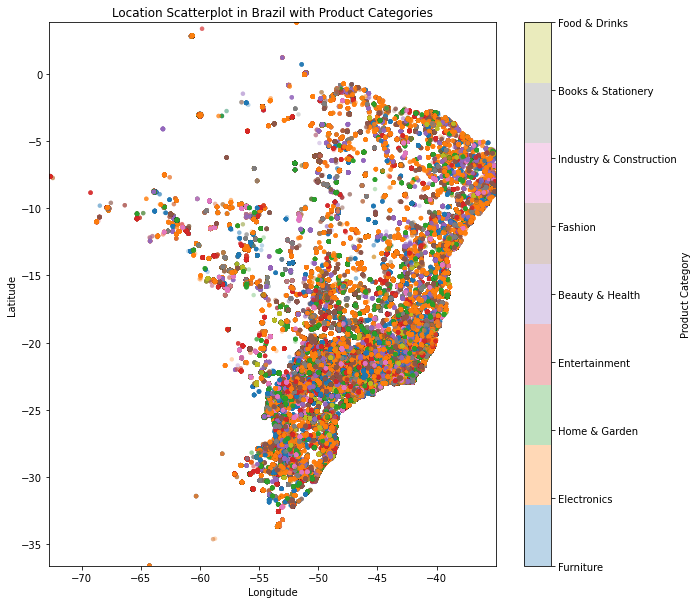

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming concat_sales is your GeoDataFrame with latitude, longitude, and product_category_name_english columns
min_lat, max_lat = concat_sales['geolocation_lat'].min(), concat_sales['geolocation_lat'].max()
min_lon, max_lon = concat_sales['geolocation_lng'].min(), concat_sales['geolocation_lng'].max()

# Filter the world GeoDataFrame to only include the bounding box of your points
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.cx[min_lon:max_lon, min_lat:max_lat]

# Get unique categories and assign a unique color to each category
categories = concat_sales['product_category_name_english'].unique()
category_colors = plt.cm.tab10.colors[:len(categories)]

# Create a colormap
cmap = ListedColormap(category_colors)

# Map category names to colors
color_mapping = concat_sales['product_category_name_english'].map(dict(zip(categories, range(len(categories)))))

# Create a scatter plot based on location with colors representing product categories
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(
    concat_sales['geolocation_lng'],
    concat_sales['geolocation_lat'],
    s=20,  # Adjust the marker size as needed
    c=color_mapping,  # Use mapped colors
    cmap=cmap,  # Use the defined colormap
    edgecolor='none',  # Remove the black circle edges
    alpha=0.3,  # Set alpha to 0.8 for transparency
)

# Set the plot limits based on the bounding box of your points
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add a colorbar for the product categories
cbar = plt.colorbar(scatter, ticks=range(len(categories)), label='Product Category')
cbar.set_ticklabels(categories)

# Add a title and axis labels
plt.title('Location Scatterplot in Brazil with Product Categories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

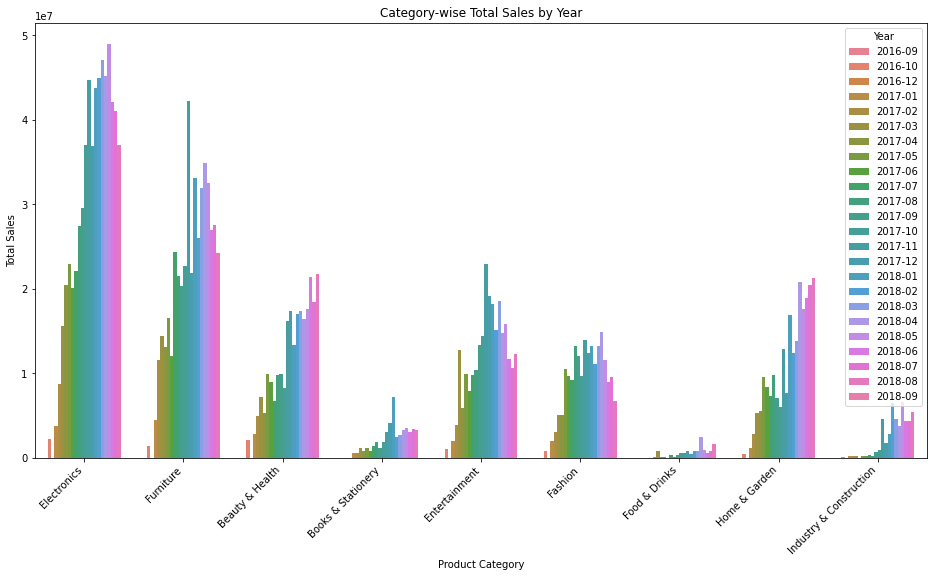

In [136]:
count_sales = concat_sales.groupby(['year_month', 'product_category_name_english'])['price'].sum().reset_index()

custom_palette = sns.color_palette("husl", 24)
plt.figure(figsize=(16, 8))
sns.barplot(x='product_category_name_english', y='price', hue='year_month', data=count_sales, palette=custom_palette)
plt.title('Category-wise Total Sales by Year')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.show()